In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('stroke_data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.drop(columns=['id'],inplace=True)

In [9]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [10]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [11]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

<Axes: xlabel='gender'>

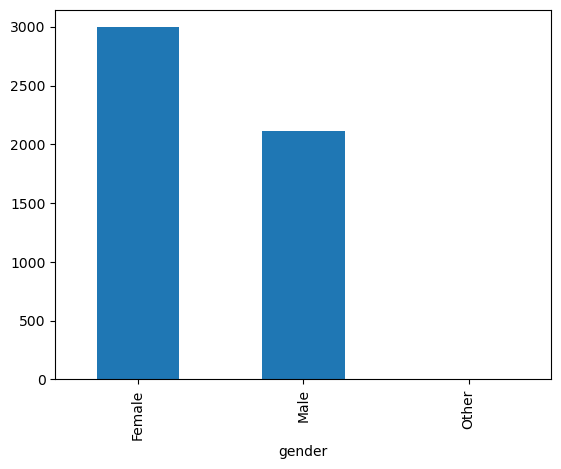

In [12]:
df['gender'].value_counts().plot(kind='bar')

In [13]:
df[df['gender']=='Female'].shape[0]

2994

In [14]:
df.shape[0]

5110

In [15]:
female_percentage=(2994/5110)*100
female_percentage

58.590998043052835

In [16]:
df[df['gender']=='Male'].shape[0]

2115

In [17]:
male_percentage=(2115/5110)*100
male_percentage

41.3894324853229

In [18]:
df['age'].unique()

array([6.70e+01, 6.10e+01, 8.00e+01, 4.90e+01, 7.90e+01, 8.10e+01,
       7.40e+01, 6.90e+01, 5.90e+01, 7.80e+01, 5.40e+01, 5.00e+01,
       6.40e+01, 7.50e+01, 6.00e+01, 5.70e+01, 7.10e+01, 5.20e+01,
       8.20e+01, 6.50e+01, 5.80e+01, 4.20e+01, 4.80e+01, 7.20e+01,
       6.30e+01, 7.60e+01, 3.90e+01, 7.70e+01, 7.30e+01, 5.60e+01,
       4.50e+01, 7.00e+01, 6.60e+01, 5.10e+01, 4.30e+01, 6.80e+01,
       4.70e+01, 5.30e+01, 3.80e+01, 5.50e+01, 1.32e+00, 4.60e+01,
       3.20e+01, 1.40e+01, 3.00e+00, 8.00e+00, 3.70e+01, 4.00e+01,
       3.50e+01, 2.00e+01, 4.40e+01, 2.50e+01, 2.70e+01, 2.30e+01,
       1.70e+01, 1.30e+01, 4.00e+00, 1.60e+01, 2.20e+01, 3.00e+01,
       2.90e+01, 1.10e+01, 2.10e+01, 1.80e+01, 3.30e+01, 2.40e+01,
       3.40e+01, 3.60e+01, 6.40e-01, 4.10e+01, 8.80e-01, 5.00e+00,
       2.60e+01, 3.10e+01, 7.00e+00, 1.20e+01, 6.20e+01, 2.00e+00,
       9.00e+00, 1.50e+01, 2.80e+01, 1.00e+01, 1.80e+00, 3.20e-01,
       1.08e+00, 1.90e+01, 6.00e+00, 1.16e+00, 1.00e+00, 1.40e

<Axes: xlabel='age', ylabel='Density'>

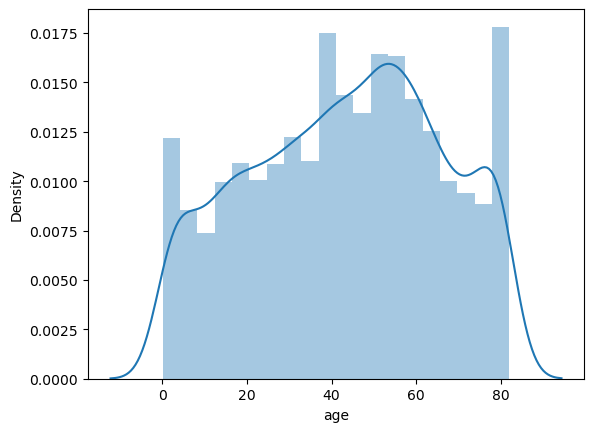

In [19]:
sns.distplot(df['age'])

In [20]:
stats.kurtosis(df['age'])

-0.9912147700517671

In [21]:
stats.skew(df['age'])

-0.1370190866396024

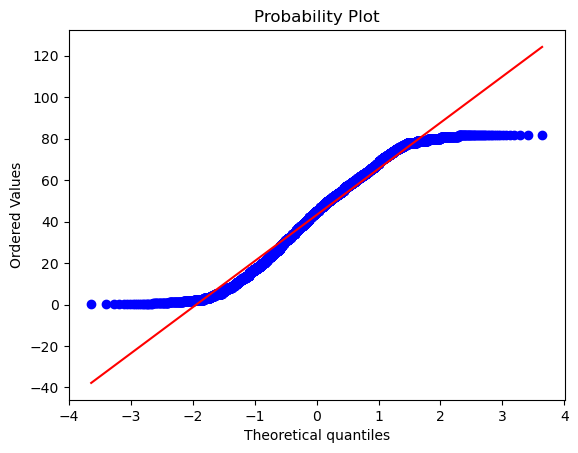

In [22]:
data=df['age']
stats.probplot(data,dist='norm',plot=plt)
plt.show()

<Axes: ylabel='age'>

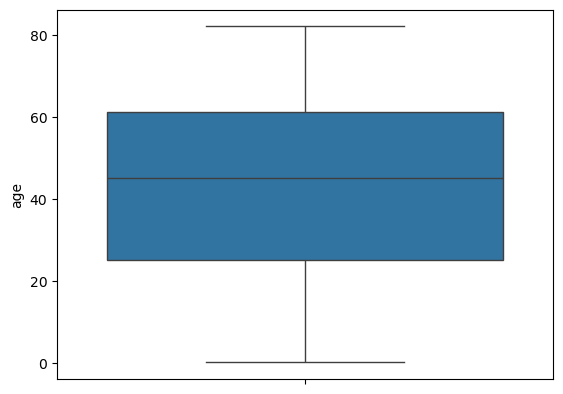

In [23]:
sns.boxplot(df['age'])

In [24]:
df['hypertension'].unique()

array([0, 1], dtype=int64)

In [25]:
df['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

<Axes: xlabel='hypertension', ylabel='Density'>

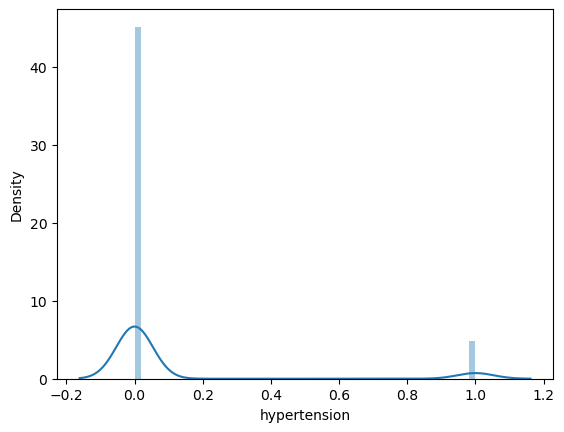

In [26]:
sns.distplot(df['hypertension'])

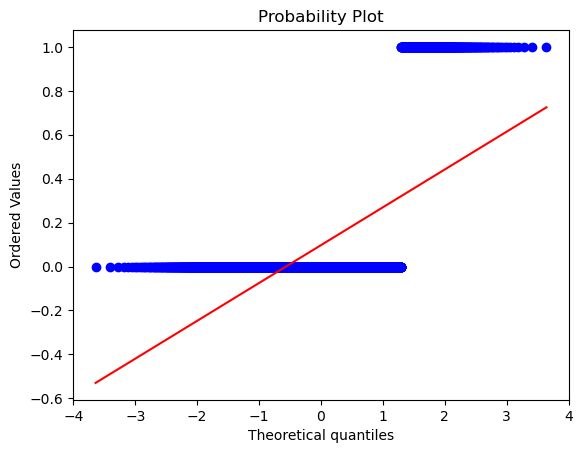

In [27]:
data=df['hypertension']
stats.probplot(data,dist='norm',plot=plt)
plt.show()

<Axes: ylabel='hypertension'>

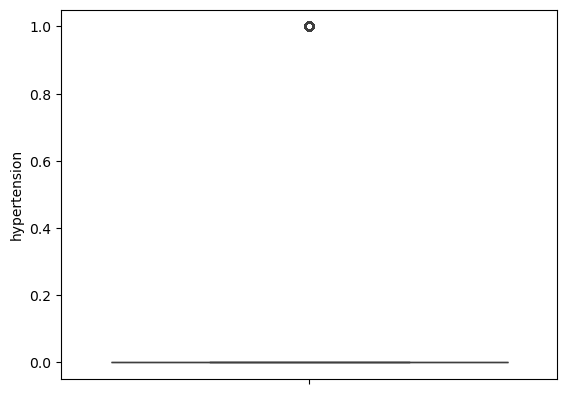

In [28]:
sns.boxplot(df['hypertension'])

In [29]:
stats.kurtosis(df['hypertension'])

5.369023361442304

In [30]:
stats.skew(df['hypertension'])

2.714594511421973

In [31]:
df['heart_disease'].unique()

array([1, 0], dtype=int64)

In [32]:
df['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

<Axes: xlabel='heart_disease', ylabel='Density'>

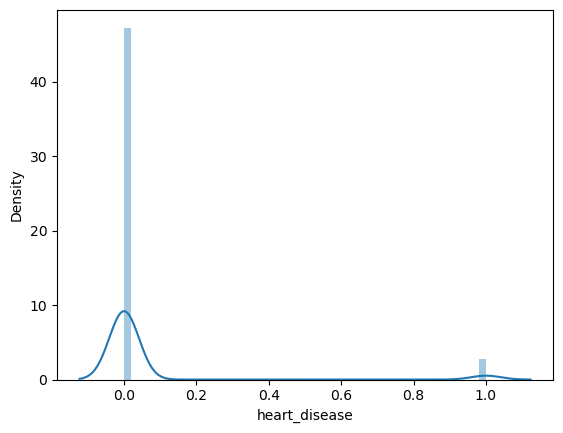

In [33]:
sns.distplot(df['heart_disease'])

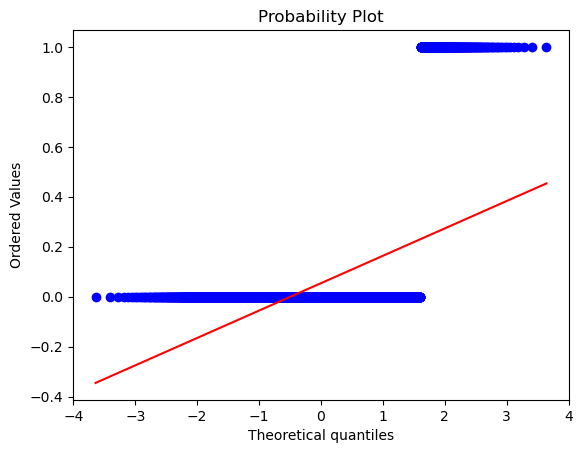

In [34]:
data=df['heart_disease']
stats.probplot(data,dist='norm',plot=plt)
plt.show()

In [35]:
stats.skew(data)

3.9460851899886302

In [36]:
stats.kurtosis(data)

13.571588326647607

<Axes: ylabel='heart_disease'>

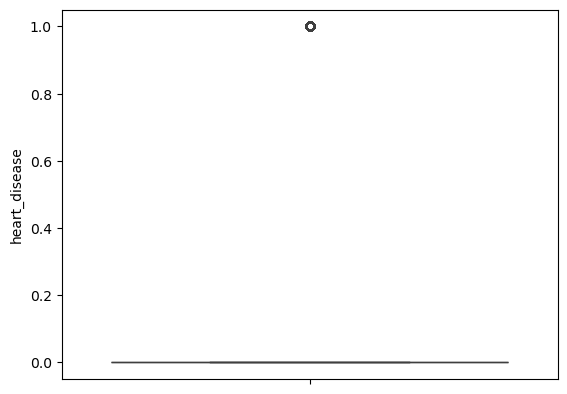

In [37]:
sns.boxplot(df['heart_disease'])

In [38]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [39]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

<Axes: xlabel='ever_married'>

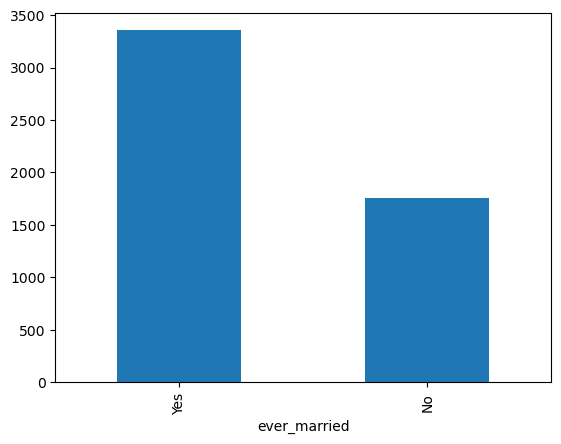

In [40]:
df['ever_married'].value_counts().plot(kind='bar')

In [41]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [42]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

<Axes: xlabel='work_type'>

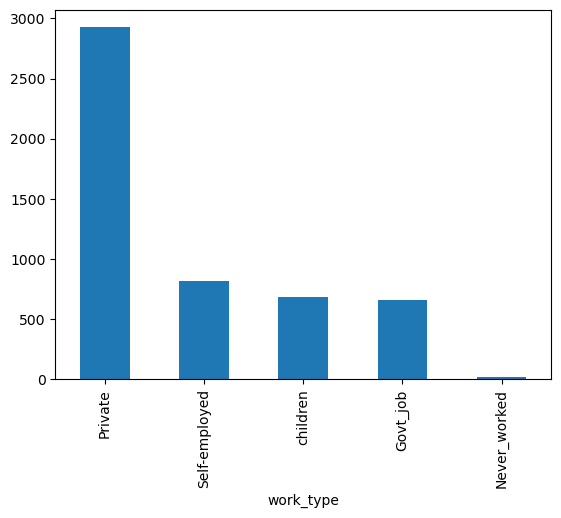

In [43]:
df['work_type'].value_counts().plot(kind='bar')

In [44]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [45]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

<Axes: xlabel='Residence_type'>

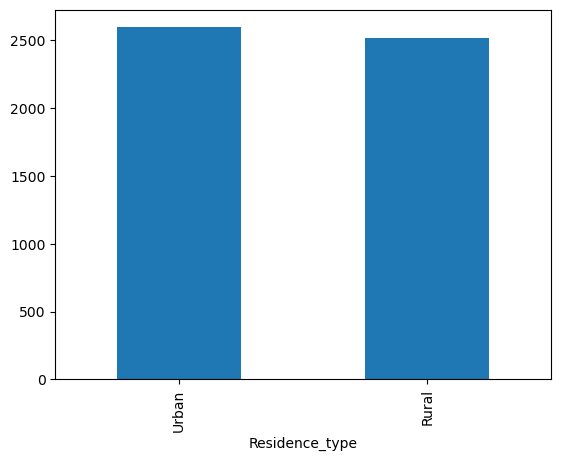

In [46]:
df['Residence_type'].value_counts().plot(kind='bar')

In [47]:
df['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

<Axes: xlabel='avg_glucose_level', ylabel='Density'>

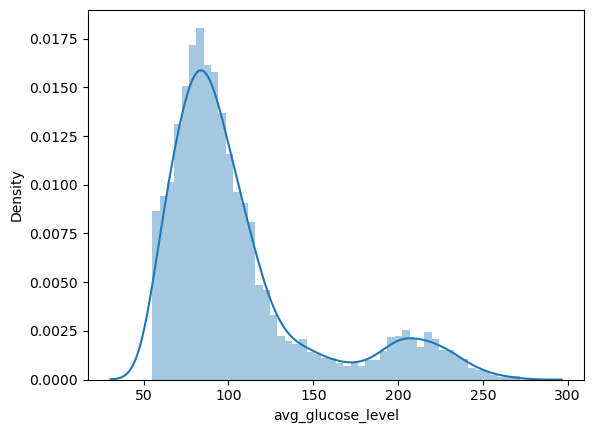

In [48]:
sns.distplot(df['avg_glucose_level'])

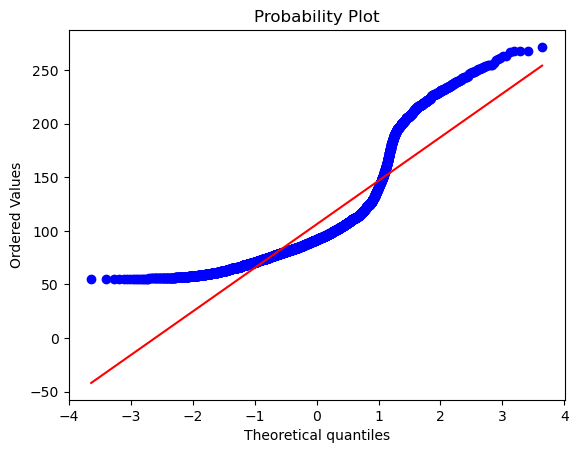

In [49]:
data=df['avg_glucose_level']
stats.probplot(data,dist='norm',plot=plt)
plt.show()

<Axes: ylabel='avg_glucose_level'>

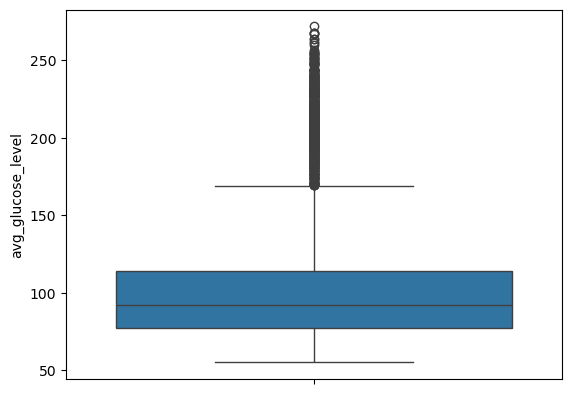

In [50]:
sns.boxplot(df['avg_glucose_level'])

In [107]:
mean=np.mean(df['avg_glucose_level'])

In [108]:
std=np.std(df['avg_glucose_level'])

In [116]:
negative_range=(mean-2*std)
negative_range

15.589418989600262

In [114]:
positive_range=(mean+2*std)
positive_range

196.70593521783613

In [52]:
df['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [53]:
df['bmi'].isnull().sum()

201

<Axes: xlabel='bmi', ylabel='Density'>

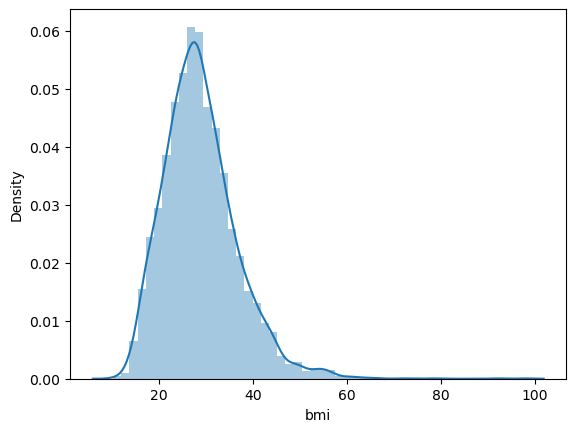

In [54]:
#conclusion:
# it looks like somewhat gaussian so we fill the missing value with the mean of the bmi
sns.distplot(df['bmi'])

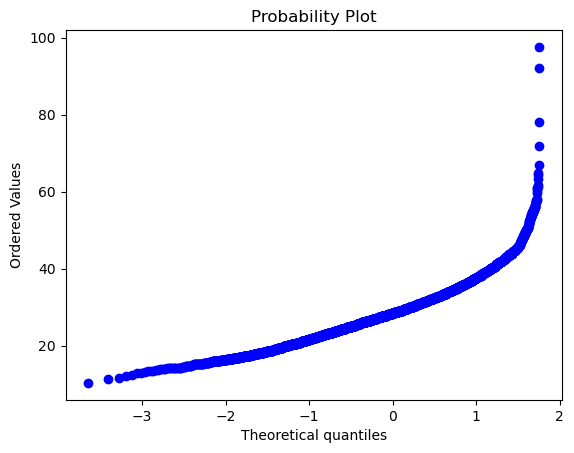

In [55]:
# to check weather the graph is gaussian or not
stats.probplot(df['bmi'],dist='norm',plot=plt)
plt.show()

In [56]:
log_values=np.log(df['bmi'])

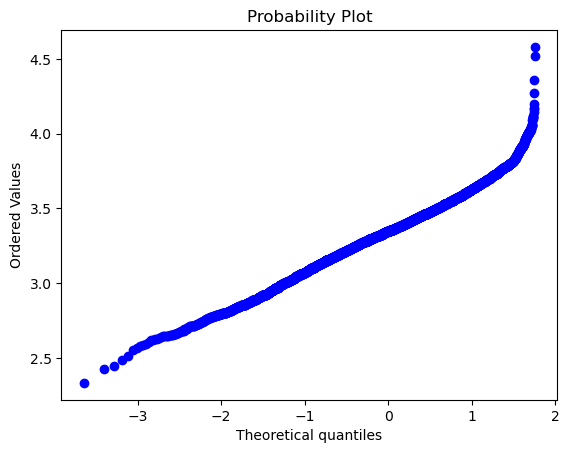

In [57]:
stats.probplot(log_values,dist='norm',plot=plt)
plt.show()

In [58]:
df['bmi']=df['bmi'].fillna(np.mean(df['bmi']))

In [59]:
df['bmi'].isnull().sum()

0

In [60]:
sorted_data=np.sort(data)
cdf_values=np.arange(1,len(sorted_data)+1)/len(sorted_data)

In [61]:
cdf_values

array([1.95694716e-04, 3.91389432e-04, 5.87084149e-04, ...,
       9.99608611e-01, 9.99804305e-01, 1.00000000e+00])

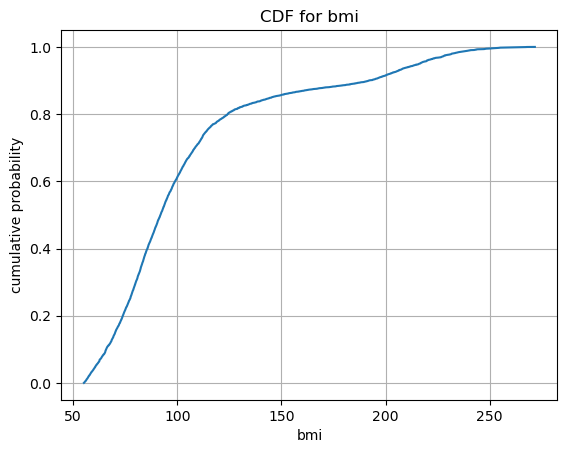

In [62]:
plt.title('CDF for bmi')
plt.xlabel('bmi')
plt.ylabel('cumulative probability')
plt.plot(sorted_data,cdf_values)
plt.grid()

In [63]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [64]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

<Axes: xlabel='smoking_status'>

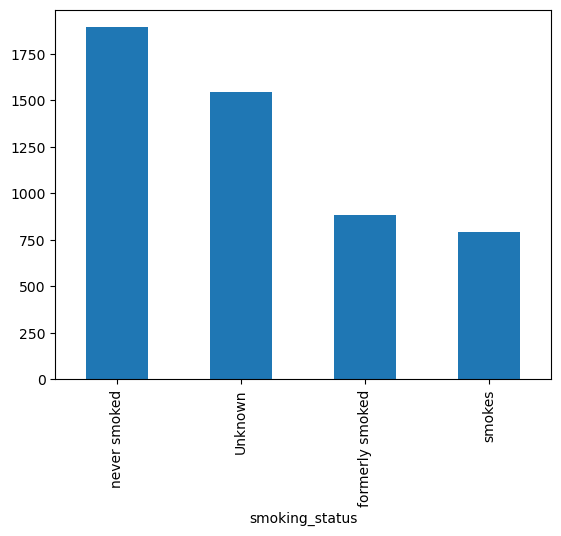

In [65]:
df['smoking_status'].value_counts().plot(kind='bar')

In [66]:
df['stroke'].unique()

array([1, 0], dtype=int64)

In [67]:
#total number of female who got the stroke
df[(df['gender']=='Female') & (df['stroke']==1)].shape[0]

141

In [68]:
#total number of male who got the stroke
df[(df['gender']=='Male') & (df['stroke']==1)].shape[0]

108

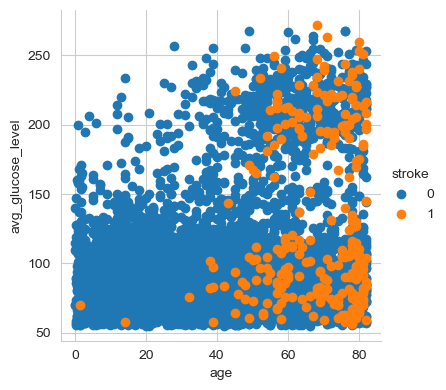

In [69]:
#conclusion:
#as age is increases glucose level is increases
#glucose level is getting increases with age
#after age of 40 there is higher chances of getting stroke
#age less than 35 there is very less chances of getting stroke.
#non_linear relation
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="stroke",height=4).map(plt.scatter,"age","avg_glucose_level").add_legend();
plt.show()

In [70]:
# the points are non linear so we find the spearman 
#positive corelation
stats.spearmanr(df['age'],df['avg_glucose_level'])

SignificanceResult(statistic=0.1451677092953779, pvalue=1.8096446852948583e-25)

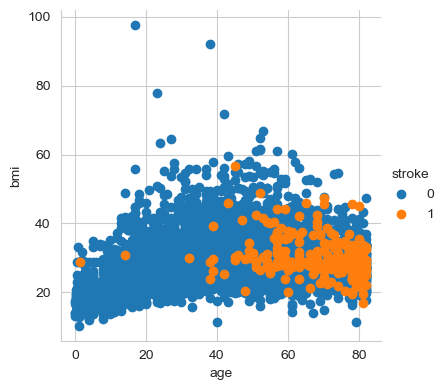

In [71]:
#conclusion:
#the age less than 40 has less chance of getting stroke 
#the age above 20 they have slightly higher bmi
# age increases stroke increases
#the age above 40 has higher chances of getting stroke
#the people whose age is less than 60 has higher bmi
#the age greater then 18 has higher chances of getting stroke
#higher chances of getting stroke when the bmi is between 20 to 40
# if bmi is less than 60 has no chances of getting stroke
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="stroke",height=4).map(plt.scatter,"age","bmi").add_legend();
plt.show()

In [72]:
# the points are non linear so we find the spearman 
#positive corelation
stats.spearmanr(df['age'],df['bmi'])

SignificanceResult(statistic=0.363661456705788, pvalue=1.4023181328908246e-159)

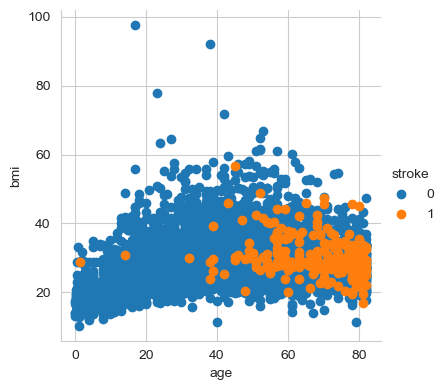

In [73]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="stroke",height=4).map(plt.scatter,"age","bmi").add_legend();
plt.show()

In [74]:
def apply_CLT(data,size_of_sample,no_of_sample):
    sample_mean=[]
    for i in range(no_of_sample):
        sample=np.random.choice(data,size=size_of_sample,replace=True)
        sample_mean.append(np.mean(sample))
    return sample_mean
size_of_sample=30
no_of_sample=1000
sample_mean=apply_CLT(data,size_of_sample,no_of_sample)
sample_mean

[109.82066666666668,
 106.14099999999999,
 112.75033333333334,
 108.29266666666666,
 102.864,
 96.57466666666664,
 101.08933333333333,
 123.32600000000001,
 107.74233333333333,
 100.94266666666667,
 97.76900000000002,
 109.27433333333333,
 104.83266666666668,
 104.23033333333333,
 116.40799999999999,
 100.32300000000002,
 100.45233333333334,
 105.88066666666667,
 91.655,
 109.59066666666668,
 116.63899999999998,
 102.71299999999998,
 109.58266666666668,
 105.55266666666668,
 96.43500000000002,
 104.59666666666666,
 117.66033333333333,
 94.08233333333332,
 97.81433333333332,
 118.26066666666667,
 107.26500000000001,
 97.79733333333334,
 104.248,
 102.21600000000002,
 102.76266666666668,
 97.52899999999998,
 108.05933333333336,
 108.89999999999999,
 99.78066666666668,
 98.29133333333334,
 106.49199999999999,
 101.99266666666668,
 105.60233333333333,
 99.88366666666666,
 107.96766666666669,
 110.38133333333333,
 96.69966666666667,
 98.702,
 98.16566666666668,
 95.72733333333332,
 103.8896

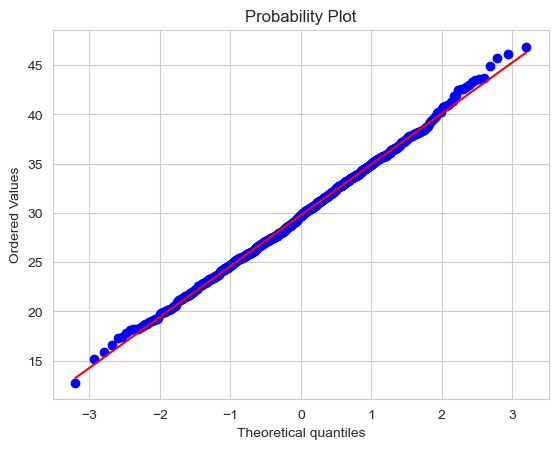

In [75]:
sample_mean=np.random.normal(loc=30,scale=5,size=1000)
stats.probplot(sample_mean,dist='norm',plot=plt)
plt.show()

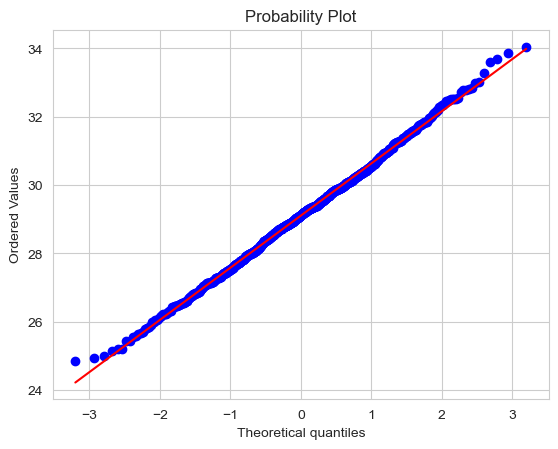

In [76]:
data=df[df['gender']=='Female']['bmi']
sample_mean = apply_CLT(data, 30, 1000)
stats.probplot(sample_mean, dist='norm', plot=plt)
plt.show()

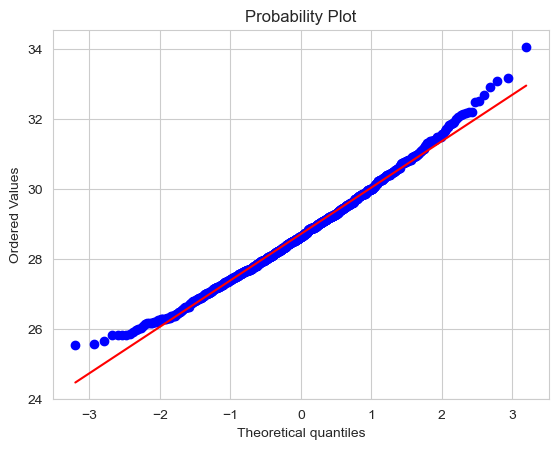

In [77]:
data=df[df['gender']=='Male']['bmi']
sample_mean = apply_CLT(data, 30, 1000)
stats.probplot(sample_mean, dist='norm', plot=plt)
plt.show()

In [78]:
female_avg_bmi=df[df['gender']=='Female']['bmi'].mean()
female_avg_bmi

29.060168330141646

In [79]:
male_avg_bmi=df[df['gender']=='Male']['bmi'].mean()
male_avg_bmi

28.65999841079274

In [80]:
stats.spearmanr(df['age'],df['heart_disease'])

SignificanceResult(statistic=0.26962727093389066, pvalue=7.904110332957262e-86)

In [81]:
stats.spearmanr(df['age'],df['hypertension'])

SignificanceResult(statistic=0.28064743429853867, pvalue=4.010053113295675e-93)

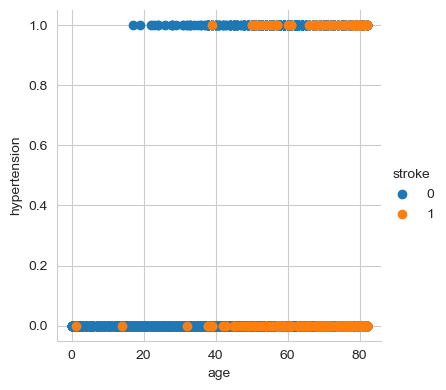

In [82]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="stroke",height=4).map(plt.scatter,"age","hypertension").add_legend();
plt.show()

In [83]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [84]:
df[(df['gender']=='Female') & (df['heart_disease']==1)].shape[0]

113

In [85]:
female_percent=(113/5110)*100
female_percent

2.2113502935420746

In [86]:
df[(df['gender']=='Male') & (df['heart_disease']==1)].shape[0]

163

In [87]:
male_percent=(163/5110)*100
male_percent

3.189823874755381

In [88]:
stats.spearmanr(df['hypertension'],df['stroke'])

SignificanceResult(statistic=0.1279038234664802, pvalue=4.3675567699736756e-20)

In [89]:
female_avg_bmi=df[df['gender']=='Female']['avg_glucose_level'].mean()
female_avg_bmi

104.05780895123581

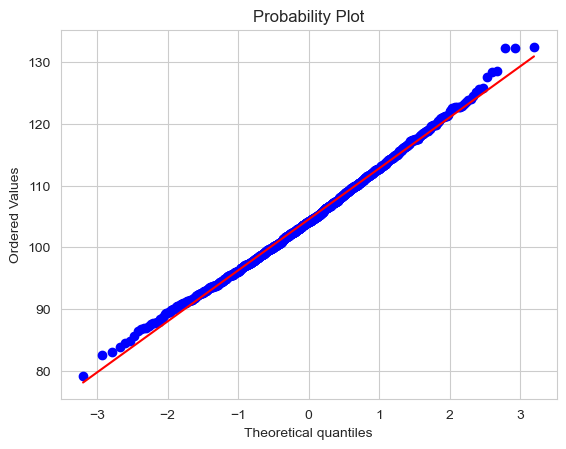

In [90]:
data=df[df['gender']=='Female']['avg_glucose_level']
sample_mean = apply_CLT(data, 30, 1000)
stats.probplot(sample_mean, dist='norm', plot=plt)
plt.show()

In [91]:
male_avg_bmi=df[df['gender']=='Male']['avg_glucose_level'].mean()
male_avg_bmi

109.08852009456265

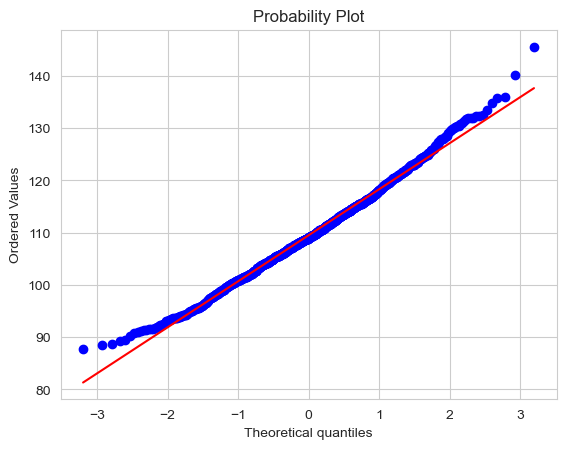

In [92]:
data=df[df['gender']=='Male']['avg_glucose_level']
sample_mean = apply_CLT(data, 30, 1000)
stats.probplot(sample_mean, dist='norm', plot=plt)
plt.show()

In [93]:
df[(df['Residence_type']=='Urban') & (df['stroke']==1)].shape[0]

135

In [94]:
percent_urban=(135/5110)*100
percent_urban

2.6418786692759295

In [95]:
df[(df['Residence_type']=='Rural') & (df['stroke']==1)].shape[0]

114

In [96]:
percent_Rural=(114/5110)*100
percent_Rural

2.2309197651663406

In [97]:
stats.spearmanr(df['bmi'],df['stroke'])

SignificanceResult(statistic=0.05501468562256554, pvalue=8.32999558293999e-05)

In [98]:
# how many people are smokes who got a stroke
df[(df['smoking_status']=='smokes') & (df['stroke']==1)].shape[0]

42

In [99]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [117]:
continuous=[
    'age',
    'avg_glucose_level',
    'bmi']

In [120]:
df[continuous].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.698018
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


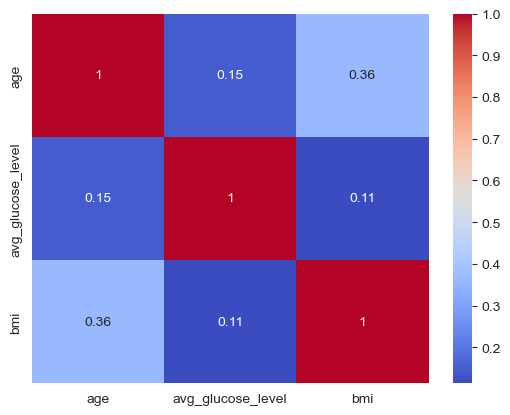

In [129]:
sns.heatmap(df[continuous].corr(method='spearman'),annot=True,cmap='coolwarm')
plt.show()